In [1]:
import pandas as pd
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss


In [2]:
data=pd.read_csv("/content/Titanic-Dataset.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# Handle missing values
imputer = SimpleImputer(strategy="median")
data["Age"] = imputer.fit_transform(data[["Age"]])
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

<ipython-input-5-404828881fbf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)


In [6]:
#data = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [7]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

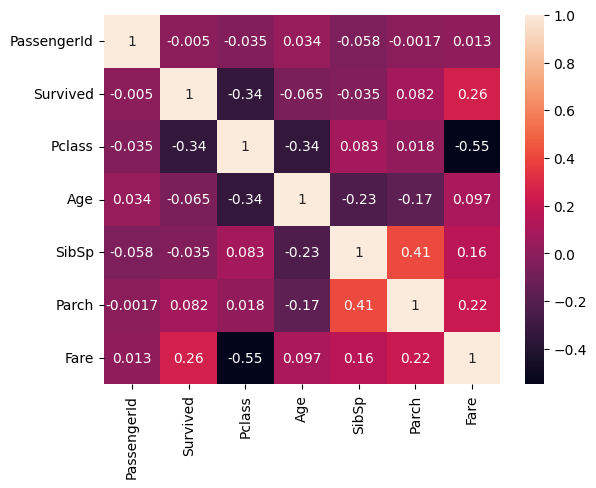

In [8]:
numeric_data = data.select_dtypes(include='number')
corr = numeric_data.corr()
sns.heatmap(corr,annot = True)

In [9]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [10]:
# Define features and target
X = data.drop(columns=["Survived", "Name", "Ticket","Cabin"])
y = data["Survived"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
def fifth_model():
    return LogisticRegression(C=0.5,
                              penalty='l2',
                              solver='lbfgs',
                              max_iter=100,
                              random_state=42)

logistic_model = fifth_model()
logistic_model.fit(X_train, y_train)

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

In [14]:
y_pred_prob = logistic_model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [15]:
from sklearn.metrics import log_loss

y_pred_proba = logistic_model.predict_proba(X_test)
test_loss = log_loss(y_test, y_pred_proba)
print(f"Test Log Loss: {test_loss}")

Test Log Loss: 0.4216502933755423


In [16]:
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.4f}'.format(test_accuracy))
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1 Score: {f1}')

Test Loss: 0.4217
Test Accuracy: 0.8101
Test Precision: 0.8091625969233472
Test Recall: 0.8100558659217877
Test F1 Score: 0.8091929317716401


In [17]:
import joblib
joblib.dump(logistic_model, "model.keras")

['model.keras']

In [18]:
import matplotlib.pyplot as plt
#fuction for confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels=None, cmap="Blues"):

    cm = confusion_matrix(y_true, y_pred)
    labels = labels if labels else np.unique(y_true)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

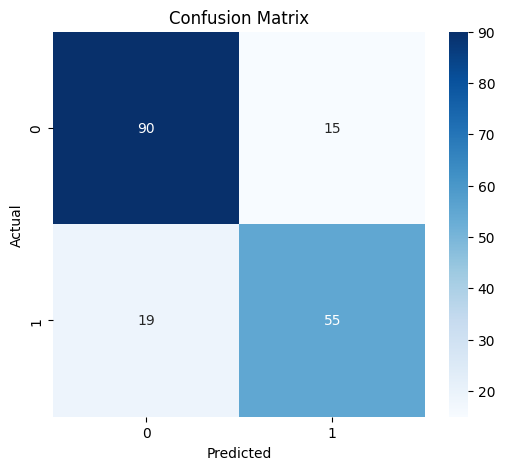

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [19]:
import numpy as np
plot_confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

In [20]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import layers, regularizers, callbacks
# from tensorflow.keras.optimizers import Adam, AdamW, RMSprop,SGD,Adagrad
# from tensorflow.keras.callbacks import EarlyStopping


In [21]:
# def first_model():
#   model = tf.keras.Sequential([
#     layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(16, activation='relu'),
#     layers.Dropout(0.35),
#     layers.Dense(1,activation='sigmoid'),

# ])
#   optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#   model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy", "precision", "recall"])

#   return model

# #instance of model
# model=first_model()
# model.save("first_model.h5")

In [22]:
# history = model.fit(
#     X_train, y_train,
#     epochs=100,
#     verbose=1,
#     #validation_split=validation_split,
# )


In [23]:
# y_pred_prob = model.predict(X_test)
# threshold = 0.5
# y_pred = (y_pred_prob > threshold).astype(int)
# y_pred

In [24]:
# test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)

# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred,average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print('Test Loss: {:.4f}'.format(test_loss))
# print('Test Accuracy: {:.4f}'.format(test_accuracy))
# print(f'Test Precision: {precision}')
# print(f'Test Recall: {recall}')
# print(f'Test F1 Score: {f1}')